In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout, LSTM, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, SpatialDropout1D, SimpleRNN
from keras.layers.recurrent import GRU
from tensorflow.keras.optimizers import Adam
from numpy import array

2021-09-25 15:19:18.266481: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-25 15:19:18.266510: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv("./dataset/preprocessed_datasets/final_dataset.csv", sep=',')

In [3]:
X = df['comment']
y = df['emotion']

In [4]:
text = df['comment'].tolist()
token = Tokenizer()
token.fit_on_texts(text)
vocab_size = len(token.word_index) + 1

In [5]:
encoded_text = token.texts_to_sequences(text)

In [6]:
max_length = 120 # machine learning potrzebuje żeby zdania były max sized (pewnie pozostałe to 0)
X = pad_sequences(encoded_text, maxlen=max_length, padding='post') # padding post po to, by 0 byly dodane na koncu listy

In [7]:
path_to_glove_file = "./pretrained_vectors/glove.6B.200d.txt"

In [8]:
glove_vectors = dict()
with open(path_to_glove_file) as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:])  # list will be converted as array
        glove_vectors[word] = vectors

In [9]:
word_vector_matrix = np.zeros((vocab_size, 200))

In [10]:
for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector

In [11]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
y_label = le.fit_transform(y)
y_label = to_categorical(y_label, num_classes=6)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42, test_size=0.2)

In [14]:
vec_size = 200

In [15]:
model4 = Sequential()
model4.add(Embedding(vocab_size, vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False)) # wagi to sa wektory

# model4.add(LSTM(128, return_sequences=True))

model4.add(Conv1D(128, 3, activation='relu'))
model4.add(MaxPooling1D(5))

model4.add(Conv1D(64, 3, activation='relu'))
model4.add(MaxPooling1D(2))
model4.add(Dropout(0.3))

model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.3))

model4.add(Dense(16, activation='relu'))
model4.add(GlobalMaxPooling1D())

model4.add(Dense(6, activation='softmax'))

model4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

2021-09-25 15:20:05.360446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-25 15:20:05.360476: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-25 15:20:05.360494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wojtek-VirtualBox): /proc/driver/nvidia/version does not exist
2021-09-25 15:20:05.362850: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-25 15:20:05.392790: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 13780800 exce

Epoch 1/60
  4/247 [..............................] - ETA: 11s - loss: 1.8723 - accuracy: 0.1406

2021-09-25 15:20:06.589549: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 13876800 exceeds 10% of free system memory.


247/247 [==============================] - 15s 56ms/step - loss: 1.8053 - accuracy: 0.1860 - val_loss: 1.7732 - val_accuracy: 0.2056
Epoch 2/60
247/247 [==============================] - 9s 36ms/step - loss: 1.7507 - accuracy: 0.2274 - val_loss: 1.7287 - val_accuracy: 0.2496
Epoch 3/60
247/247 [==============================] - 8s 34ms/step - loss: 1.6941 - accuracy: 0.2721 - val_loss: 1.6558 - val_accuracy: 0.2942
Epoch 4/60
247/247 [==============================] - 8s 32ms/step - loss: 1.6193 - accuracy: 0.3193 - val_loss: 1.5704 - val_accuracy: 0.3534
Epoch 5/60
247/247 [==============================] - 7s 30ms/step - loss: 1.5312 - accuracy: 0.3659 - val_loss: 1.4975 - val_accuracy: 0.3914
Epoch 6/60
247/247 [==============================] - 8s 30ms/step - loss: 1.4545 - accuracy: 0.3958 - val_loss: 1.4198 - val_accuracy: 0.4415
Epoch 7/60
247/247 [==============================] - 8s 30ms/step - loss: 1.4030 - accuracy: 0.4264 - val_loss: 1.3710 - val_accuracy: 0.4572
Epoch 8/6

In [38]:
model5 = Sequential()
model5.add(Embedding(vocab_size, 
                     vec_size, 
                     input_length=max_length, 
                     weights=[word_vector_matrix], 
                     trainable=False))

model5.add(LSTM(128, return_sequences=True))

model5.add(Conv1D(128, 3, activation='relu'))
model5.add(MaxPooling1D(5))

model5.add(Conv1D(64, 3, activation='relu'))
model5.add(MaxPooling1D(2))
model5.add(Dropout(0.3))

model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.3))

model5.add(Dense(16, activation='relu'))
model5.add(GlobalMaxPooling1D())

model5.add(Dense(6, activation='softmax'))

model5.compile(optimizer=Adam(learning_rate=0.0001), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=33, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/33
247/247 [==============================] - 41s 159ms/step - loss: 1.7781 - accuracy: 0.2142 - val_loss: 1.7494 - val_accuracy: 0.2835
Epoch 2/33
247/247 [==============================] - 41s 166ms/step - loss: 1.6883 - accuracy: 0.3021 - val_loss: 1.6248 - val_accuracy: 0.3565
Epoch 3/33
247/247 [==============================] - 43s 176ms/step - loss: 1.5710 - accuracy: 0.3596 - val_loss: 1.5112 - val_accuracy: 0.4152
Epoch 4/33
247/247 [==============================] - 41s 165ms/step - loss: 1.4602 - accuracy: 0.4171 - val_loss: 1.3963 - val_accuracy: 0.4734
Epoch 5/33
247/247 [==============================] - 39s 159ms/step - loss: 1.3592 - accuracy: 0.4711 - val_loss: 1.2799 - val_accuracy: 0.5372
Epoch 6/33
247/247 [==============================] - 43s 172ms/step - loss: 1.2527 - accuracy: 0.5236 - val_loss: 1.2255 - val_accuracy: 0.5630
Epoch 7/33
247/247 [==============================] - 43s 173ms/step - loss: 1.1571 - accuracy: 0.5756 - val_loss: 1.1358 - val_ac

In [19]:
import matplotlib.pyplot as plt

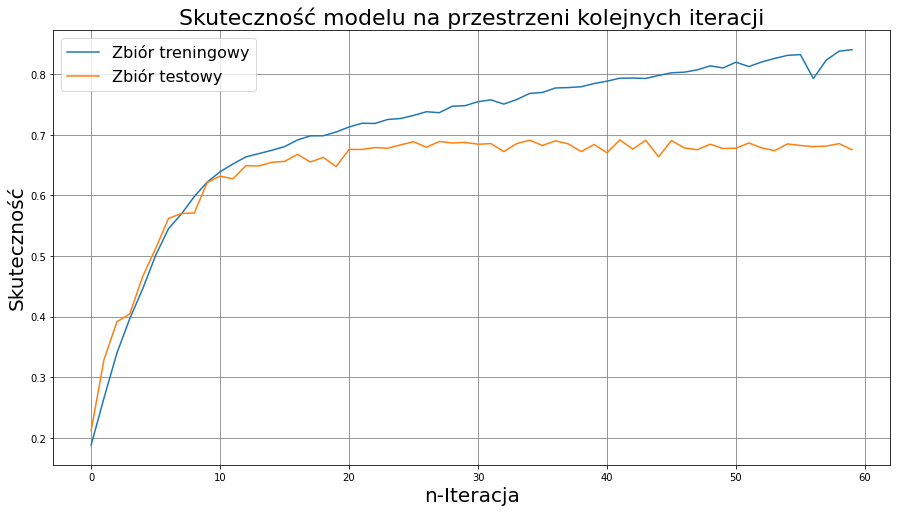

In [34]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Skuteczność modelu na przestrzeni kolejnych iteracji', size=22)
plt.ylabel('Skuteczność', size=20)
plt.xlabel('n-Iteracja', size=20)
plt.legend(['Zbiór treningowy', 'Zbiór testowy'], loc='upper left', prop={'size': 16})
plt.rcParams["figure.figsize"] = (15,8)
plt.grid(color='gray', linestyle='-')
# plt.show()
plt.savefig('plt1.png')

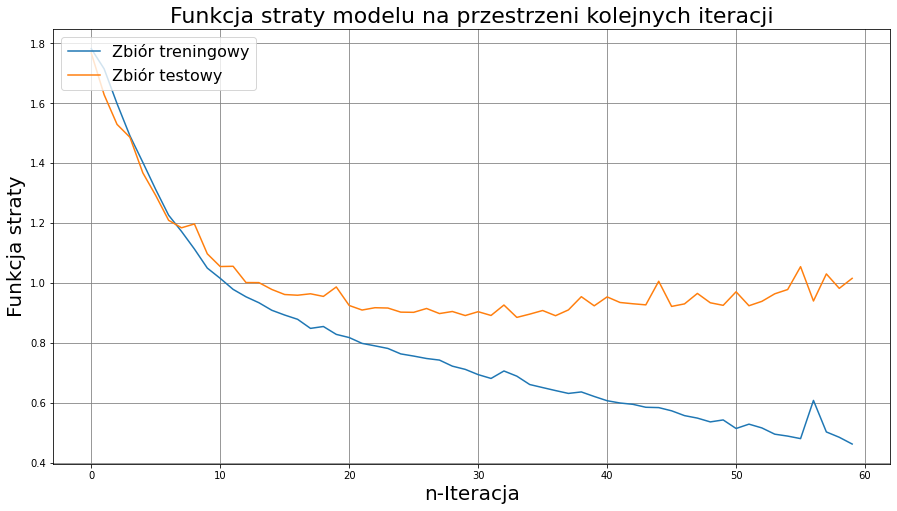

In [35]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Funkcja straty modelu na przestrzeni kolejnych iteracji', size=22)
plt.ylabel('Funkcja straty', size=20)
plt.xlabel('n-Iteracja', size=20)
plt.legend(['Zbiór treningowy', 'Zbiór testowy'], loc='upper left', prop={'size': 16})
plt.rcParams["figure.figsize"] = (15,8)
plt.grid(color='gray', linestyle='-')
# plt2.show()
plt.savefig('plt2.png')

In [39]:
reverse_word_map = dict(map(reversed, token.word_index.items()))
sentence = []
for i in X_test[0:1][0]:
    if i == 0:
        break
    sentence.append(reverse_word_map[i])
' '.join(sentence)

results = []

for i in range(len(y_test)+1):
    try:
        pred = model4.predict(X_test[i:i+1])
    except ValueError:
        continue
    another_pred = (-pred).argsort()[:2]
    pred = le.inverse_transform((np.argmax(pred, axis=None, out=None),))[0]
    result = le.inverse_transform((np.argmax(y_test[i:i+1], axis=None, out=None),))[0]
    prim_pred = le.inverse_transform((another_pred[0][0],))[0]
    sec_pred = le.inverse_transform((another_pred[0][1],))[0]
    if pred != result:
        sentence = []
        for a in X_test[i:i+1][0]:
            if a == 0:
                break
            sentence.append(reverse_word_map[a])
        classified_sentence = ' '.join(sentence)
        results.append([classified_sentence, result, prim_pred, sec_pred])
    
df_misclassified = pd.DataFrame(results, columns=['Sentence', 'Result', 'Primary Prediction', 'Secondary Prediction'])

In [40]:
df_misclassified

,Sentence,Result,Primary Prediction,Secondary Prediction
0,breaking up with a girl,sadness,anger,disgust
1,haha i love surprises i do not work til sunday...,surprise,happiness,sadness
2,i am so happy but frustrated at the same time ...,happiness,surprise,happiness
3,downloadfestivals lineup is not as good as i t...,sadness,fear,happiness
4,thinking of the unknown what happens at the mo...,fear,sadness,fear
...,...,...,...,...
679,when i was appointed to position of trust in a...,happiness,anger,fear
680,when i learned that a relative had been spread...,disgust,anger,sadness
681,when a friend after being free of drugs for ha...,sadness,disgust,anger
682,you got it all done even the labs that is all ...,surprise,sadness,happiness


In [41]:
len(y_test)

1975

In [42]:
df_misclassified[df_misclassified['Result'] == df_misclassified['Secondary Prediction']]

,Sentence,Result,Primary Prediction,Secondary Prediction
2,i am so happy but frustrated at the same time ...,happiness,surprise,happiness
4,thinking of the unknown what happens at the mo...,fear,sadness,fear
5,right before i went to a concert with my last ...,happiness,sadness,happiness
7,i think i jug missed my last bus need to walk ...,surprise,fear,surprise
8,i was so looking forward to 2021 being the yea...,disgust,anger,disgust
...,...,...,...,...
657,i failed a subject despite the fact that i had...,sadness,happiness,sadness
658,when i was ditched by my girlfriend,sadness,anger,sadness
661,my twitter has been hacked again,fear,surprise,fear
676,we had to finish the life of our 8 yearsold dog,sadness,happiness,sadness


In [43]:
df_misclassified["Result"].groupby([df_misclassified["Result"], df_misclassified["Secondary Prediction"]]).size().unstack().fillna(0).astype(int)

Secondary Prediction,anger,disgust,fear,happiness,sadness,surprise
Result,,,,,,
anger,29,11,16,4,21,2
disgust,11,43,11,5,35,7
fear,14,9,67,18,25,3
happiness,19,9,41,27,18,6
sadness,21,9,20,11,61,11
surprise,7,7,12,7,25,42


In [44]:
df_misclassified["Result"].groupby([df_misclassified["Result"], df_misclassified["Primary Prediction"]]).size().unstack().fillna(0).astype(int)

Primary Prediction,anger,disgust,fear,happiness,sadness,surprise
Result,,,,,,
anger,0,19,23,12,14,15
disgust,56,0,27,13,11,5
fear,33,20,0,24,33,26
happiness,23,9,19,0,33,36
sadness,31,9,22,40,0,31
surprise,17,9,22,36,16,0


In [45]:
df_completely_misclassified = df_misclassified[df_misclassified['Result'] != df_misclassified['Secondary Prediction']]

In [46]:
df_completely_misclassified

,Sentence,Result,Primary Prediction,Secondary Prediction
0,breaking up with a girl,sadness,anger,disgust
1,haha i love surprises i do not work til sunday...,surprise,happiness,sadness
3,downloadfestivals lineup is not as good as i t...,sadness,fear,happiness
6,my last genetics midterm a decent grade,happiness,fear,anger
9,when my daughter began staying away from class...,anger,sadness,fear
...,...,...,...,...
679,when i was appointed to position of trust in a...,happiness,anger,fear
680,when i learned that a relative had been spread...,disgust,anger,sadness
681,when a friend after being free of drugs for ha...,sadness,disgust,anger
682,you got it all done even the labs that is all ...,surprise,sadness,happiness


In [47]:
df_completely_misclassified["Result"].groupby([df_completely_misclassified["Result"], df_completely_misclassified["Primary Prediction"]]).size().unstack().fillna(0).astype(int)

Primary Prediction,anger,disgust,fear,happiness,sadness,surprise
Result,,,,,,
anger,0,3,19,12,8,12
disgust,21,0,22,13,11,2
fear,18,8,0,19,16,8
happiness,22,9,18,0,22,22
sadness,15,8,14,7,0,28
surprise,10,7,11,16,14,0


In [48]:
df_completely_misclassified.head(100).tail(95).head(10)

,Sentence,Result,Primary Prediction,Secondary Prediction
11,on the tov i saw a news feature on south afric...,anger,fear,disgust
13,when i got first division in the exams before ...,happiness,fear,sadness
14,i am a cantor i sing psalms in church several ...,fear,happiness,sadness
15,when i knew that there were at last no problem...,happiness,sadness,fear
16,damn i have something to say and no one is lis...,fear,surprise,happiness
18,heading south on i jacked mess around so 234,surprise,sadness,happiness
19,you are right to be upset amp angrythis is jus...,anger,surprise,sadness
20,i wish you were going too are you still coming...,happiness,surprise,fear
21,in the army my result at the shooting exercise...,happiness,sadness,fear
22,had a little family party tonight hope it rocked,happiness,sadness,surprise


In [49]:
df_completely_misclassified.head(100)

,Sentence,Result,Primary Prediction,Secondary Prediction
0,breaking up with a girl,sadness,anger,disgust
1,haha i love surprises i do not work til sunday...,surprise,happiness,sadness
3,downloadfestivals lineup is not as good as i t...,sadness,fear,happiness
6,my last genetics midterm a decent grade,happiness,fear,anger
9,when my daughter began staying away from class...,anger,sadness,fear
...,...,...,...,...
159,studying for this bullshit econ test,anger,happiness,surprise
160,travelling by coach on a rather narrow and wet...,fear,anger,surprise
164,good dinner on the national day,happiness,surprise,fear
165,i am concerned at how us media companies can b...,anger,fear,disgust


In [51]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 200)          3445200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 120, 128)          168448    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 118, 128)          49280     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 23, 128)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 21, 64)            24640     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 64)           